In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Part 1:  Prepare the Data

In [2]:
# Read myopia.csv into a Pandas DataFrame.

file_path = Path('Resources/Myopia.csv')
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
df["MYOPIC"].nunique()

2

In [4]:
labels = df['MYOPIC']
labels.value_counts().nunique()

2

In [5]:
# Get the number of columns and rows of the DataFrame
df.shape

(618, 15)

In [6]:
# Get the column names
df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'MYOPIC'],
      dtype='object')

In [7]:
# Find out if there are any missing/null values
df.isnull().sum()

AGE          0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
MYOPIC       0
dtype: int64

In [8]:
# Find out if there are any duplicated rows
df.duplicated().sum()

0

In [9]:
# Remove the "MYOPIC" column from the dataset.
df = df.drop('MYOPIC', axis=1)


In [10]:
# Check the column names
df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [11]:
# Standardise your dataset so that columns that contain larger values 
# do not influence the outcome more than columns with smaller values

# Create a scaler to standardize the data
scaler = StandardScaler()

# Train the scaler with the data
X_scaled = scaler.fit_transform(df)


In [12]:
# Determine the dimensions (features/columns) in the Myopia Datasets
X_scaled[0]


array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

# Part 2: Apply Dimensionality Reduction

In [13]:
# Perform dimensionality reduction with PCA. How did the number of the features change?

# Preserve 90% of the explained variance in dimensionality reduction
pca = PCA(n_components=0.90)

# Get the principal components for the X_train_scaled
myopia_pca = pca.fit_transform(X_scaled)

# Get the explained variance ratio
pca.explained_variance_ratio_.sum()

0.9187361702915189

In [14]:
# Get the shape of features after reduction

myopia_pca.shape

(618, 10)

In [15]:
# Further reduce the dataset dimensions with t-SNE and visually inspect the results. 
# Run t-SNE on the principal components, which is the output of the PCA transformation.

#Initialize the t-SNE model
tsne = TSNE(learning_rate=250, n_components=3, perplexity=50, verbose=1, n_iter=2500)

#Reduce dimensions
tsne_features = tsne.fit_transform(myopia_pca)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 618 samples in 0.002s...
[t-SNE] Computed neighbors for 618 samples in 0.045s...
[t-SNE] Computed conditional probabilities for sample 618 / 618
[t-SNE] Mean sigma: 1.438866
[t-SNE] KL divergence after 250 iterations with early exaggeration: 103.377213
[t-SNE] KL divergence after 2500 iterations: 2.092427


In [16]:
# Get the shape of features  after reduction
tsne_features.shape

(618, 3)

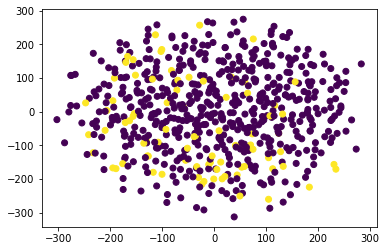

In [17]:
# Create a scatter plot of the t-SNE output. Are there distinct clusters?
plt.scatter(tsne_features[:,0],tsne_features[:,1],c=labels)

### There are no distinct clusters in the t-SNE output

# Part 3: Perform a Cluster Analysis with K-means

In [18]:
# Create an elbow plot to identify the best number of clusters.

# Use a for loop to determine the inertia for each k between 1 through 10.
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)
    
# Determine where the elbow of the plot is, and at which value of k it appears.
# Create the Elbow Curve using hvPlot

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()


,k,inertia
0,1,7948.905345
1,2,6794.293482
2,3,6030.627246
3,4,5665.932930
4,5,5377.262999


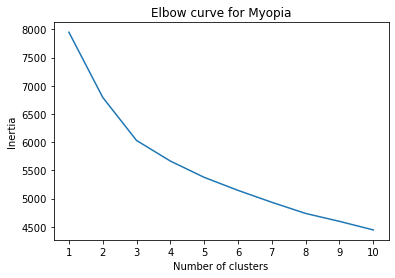

In [19]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Myopia')
plt.show()

# Part 4: Make a Recommendation

The t-SNE output showed that there is no distinct clusters among the data,and thus, t-SNE was not helpful in this analysis.

Based on the cluster analysis with K-means, the optimal number of clusters is 3, as shown in the elbow curve above. 

It will probably be usefull to split the data and into test and training dataset fo determine if this set of data will show a trend or an indication that it can be used to predict myopia. Otherwise, a larger number of dataset may be needed.  
